Prerequisites
--------
------------

**Registration number:** 191910

Alpha = 1 + mod(910,4)

**Alpha** = 3

In [1]:
# Import Statements
import numpy as np
import pandas as pd
import scipy as sc
import math
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy import signal as sg
from IPython.display import Audio

In [2]:
# Alpha  = 1 + mod(910,4)
alpha = 1 + (910%4)

In [ ]:
# This is because I'm using Google Colab Noteboook 
# So please don't run this without mounting the drive
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/DSP\ LAB/Experiment\ 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/DSP LAB/Experiment 2'
/content/drive/My Drive/DSP LAB/Experiment 2


Problem  #1
-----
-----

Question 1

In [10]:
time = np.linspace(0,1/alpha,5000)
t = [5*np.pi*alpha*time, 6*np.pi*alpha*time, 10*np.pi*alpha*time]
amp = [alpha, alpha/2, alpha/4]
fn1 = amp[0]*np.cos(t[0])
fn2 = amp[1]*np.cos(t[1])
fn3 = amp[2]*np.cos(t[2])


In [11]:
%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (15, 8),
    "axes.labelsize": 15,
    "font.size": 8})

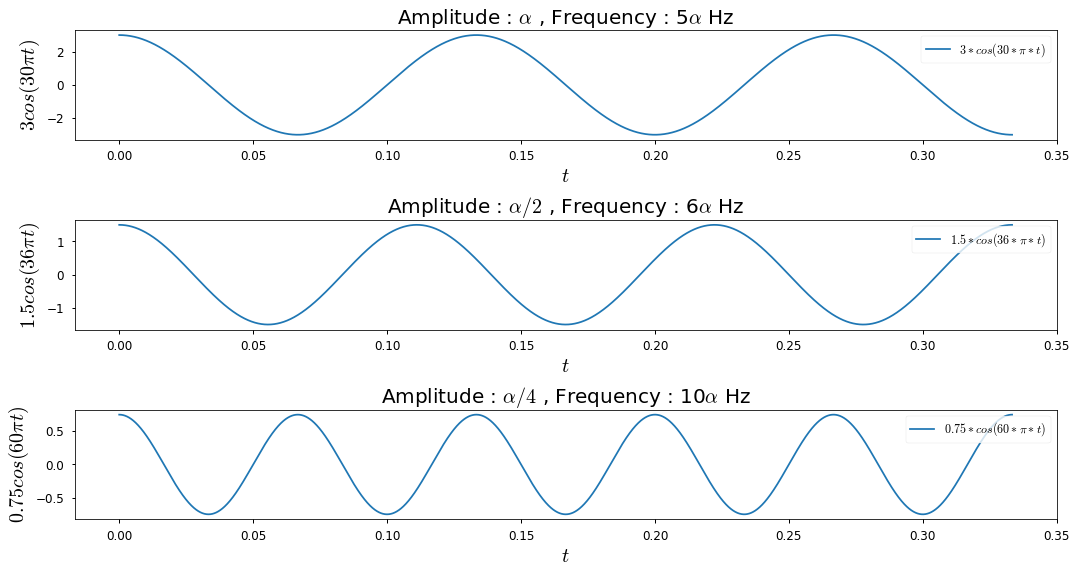

In [12]:
fig,axes = plt.subplots(3)
plot_label = ['$3*cos(30*\pi*t)$', '$1.5*cos(36*\pi*t)$', '$0.75*cos(60*\pi*t)$']
plot_title = ['Amplitude : ' + r'$\alpha$' + ' , Frequency : 5'+r'$\alpha$'+ ' Hz', 'Amplitude : ' + r'$\alpha /2$' + ' , Frequency : 6'+r'$\alpha$'+ ' Hz', 'Amplitude : ' + r'$\alpha /4$' + ' , Frequency : 10'+r'$\alpha$'+ ' Hz']
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axes[row].plot(x, y, label = plot_label[row])
    axes[row].legend(loc = 'upper right', fontsize = 12)
    axes[row].set_title(plot_title[row], fontsize = 20)
    axes[row].set_xlabel(xaxis_label, fontsize = 20)
    axes[row].set_ylabel(yaxis_label, fontsize = 20)
    axes[row].tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
plot_signal(time, fn1, xaxis_label=r'$t$', yaxis_label='$3cos(30\pi t)$', row=0)
plot_signal(time, fn2, xaxis_label=r'$t$', yaxis_label='$1.5cos(36\pi t)$', row=1)
plot_signal(time, fn3, xaxis_label=r'$t$', yaxis_label='$0.75cos(60\pi t)$', row=2)

Question 2

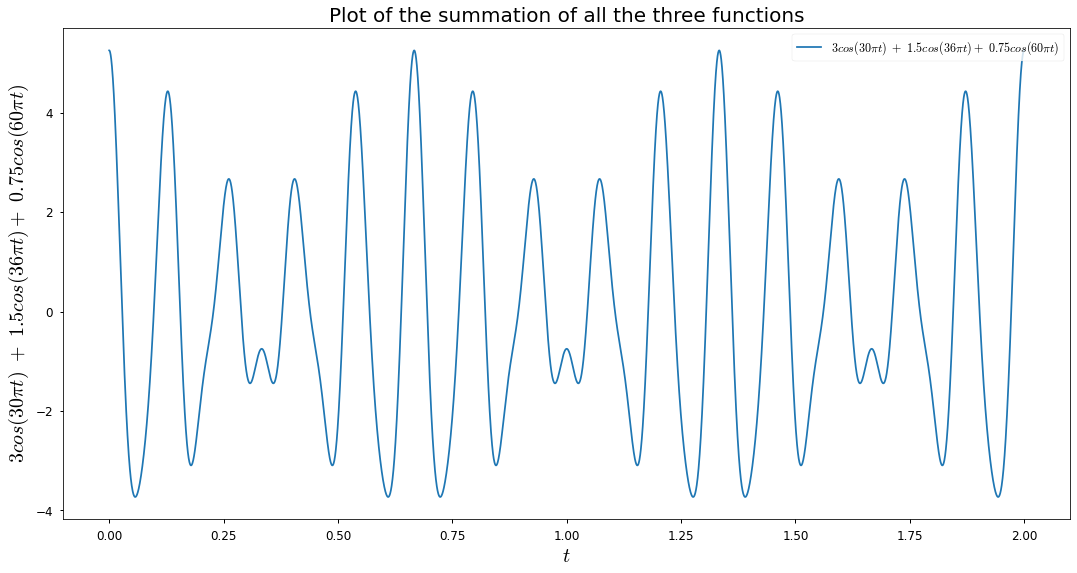

In [14]:
time = np.linspace(0,2,5000)
t = [5*np.pi*alpha*time, 6*np.pi*alpha*time, 10*np.pi*alpha*time]
amp = [alpha, alpha/2, alpha/4]
fn1 = amp[0]*np.cos(t[0])
fn2 = amp[1]*np.cos(t[1])
fn3 = amp[2]*np.cos(t[2])
sum_fn = fn1 + fn2 + fn3
fig, axes = plt.subplots()
axes.plot(time, sum_fn, label=r'$3cos(30\pi t)\ +\ 1.5cos(36\pi t) +\ 0.75cos(60\pi t)$')
axes.legend(loc = 'upper right', fontsize = 12)
axes.set_ylabel(r'$3cos(30\pi t)\ +\ 1.5cos(36\pi t) +\ 0.75cos(60\pi t)$', fontsize = 20)
axes.set_xlabel(r'$t$', fontsize = 20)
axes.tick_params(axis="both", labelsize = 12)
axes.set_title('Plot of the summation of all the three functions', fontsize = 20)
fig.tight_layout()

Question 3

* $Sampling\ frequency = 14\alpha =  42 \ \frac{samples}{sec}$
    * The sampling frequency is greater than max frequency $10\alpha$, but less than Nyquist sampling frequency 20$\alpha$ i.e, $20\alpha\leq\ 14\alpha\leq\ 20\alpha$

* Nyquist rate sampling frequency of signal = 2 times the max frequency = 2*10$\alpha$ $=$ $20\alpha$ = $60\ samples/sec$

* $6\alpha$ frequency is alised to $3\alpha$, so Folding Frequency is 4.5$\alpha$. From this we can say that Sampling frequency = $F_s = 9\alpha = 27\ samples/sec$

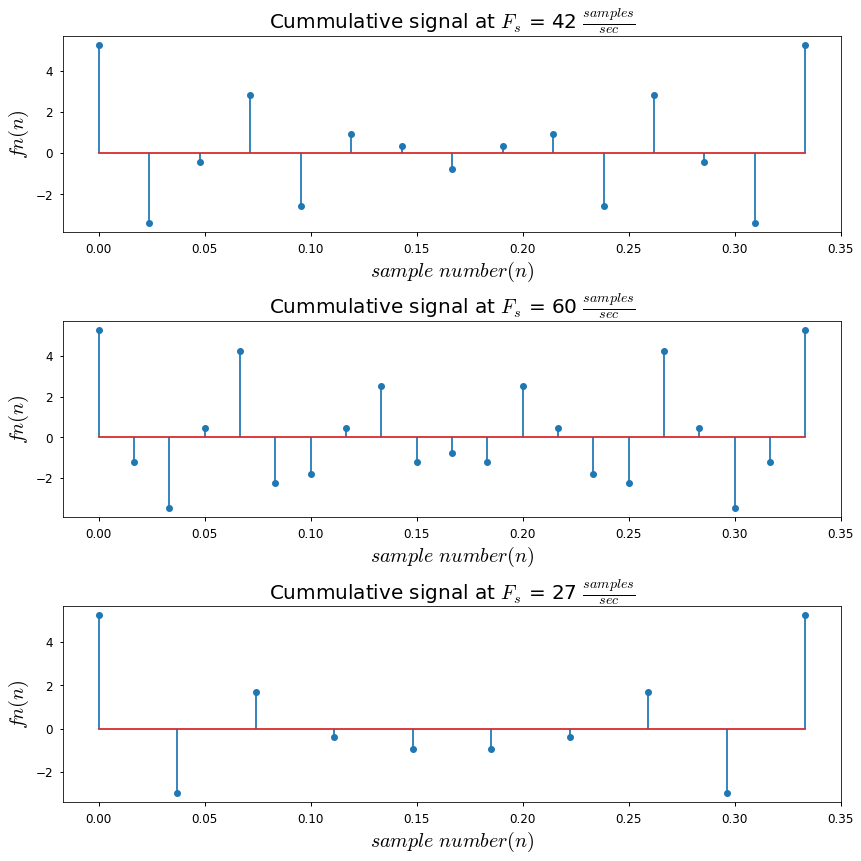

In [ ]:
def cummulative_signal(t):
  return alpha*np.cos(2*np.pi*5*alpha*t) + (alpha/2)*np.cos(2*np.pi*6*alpha*t) + (alpha/4)*np.cos(2*np.pi*10*alpha*t)

sfreq = [14*alpha,20*alpha, 9*alpha]
n1=np.arange(0, (1/alpha)+(1/sfreq[0]), (1/sfreq[0]))
n2=np.arange(0, (1/alpha)+(1/sfreq[1]), (1/sfreq[1]))
n3=np.arange(0, (1/alpha)+(1/sfreq[2]), (1/sfreq[2]))
stem_plot_title = ['Cummulative signal at $F_s$ = 42 '+ r'$\frac{samples}{sec}$','Cummulative signal at $F_s$ = 60 ' + r'$\frac{samples}{sec}$','Cummulative signal at $F_s$ = 27 ' + r'$ \frac{samples}{sec}$']
# Plots   
fig, axes = plt.subplots(3, figsize=(12,12))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axes[row].stem(x, y, use_line_collection = True)
    axes[row].set_title(stem_plot_title[row], fontsize = 20)
    axes[row].set_xlabel(xaxis_label, fontsize = 20)
    axes[row].set_ylabel(yaxis_label, fontsize = 20)
    axes[row].tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
plot_signal(n1, cummulative_signal(n1), xaxis_label=r'$sample\ number(n)$', yaxis_label=r'$fn(n)$', row=0)
plot_signal(n2, cummulative_signal(n2), xaxis_label=r'$sample\ number(n)$', yaxis_label=r'$fn(n)$', row=1)
plot_signal(n3, cummulative_signal(n3), xaxis_label=r'$sample\ number(n)$', yaxis_label=r'$fn(n)$', row=2)

Question 4

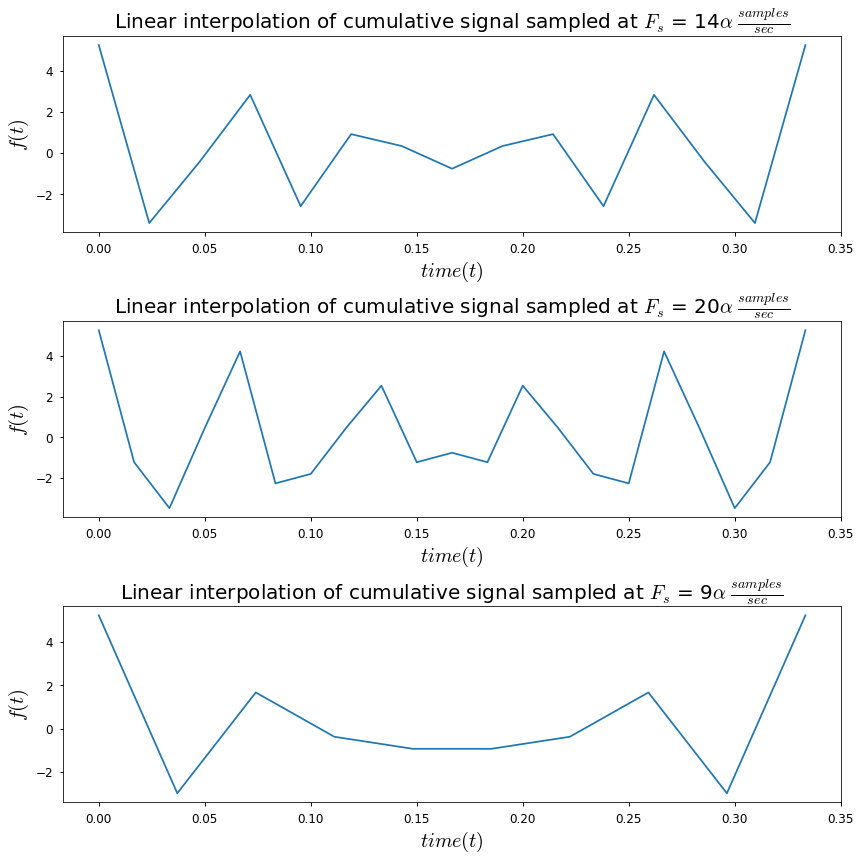

In [ ]:
title = ['Linear interpolation of cumulative signal sampled at $F_s$ = 14' + r'$\alpha\ \frac{samples}{sec}$','Linear interpolation of cumulative signal sampled at $F_s$ = 20' + r'$\alpha\ \frac{samples}{sec}$','Linear interpolation of cumulative signal sampled at $F_s$ = 9' + r'$\alpha\ \frac{samples}{sec}$']
fig, axs = plt.subplots(3, figsize=(12,12))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].plot(x, y)
    axs[row].set_title(title[row], fontsize = 20)
    axs[row].set_xlabel(xaxis_label, fontsize = 20)
    axs[row].set_ylabel(yaxis_label, fontsize = 20)
    axs[row].tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot_signal(n1, cummulative_signal(n1), xaxis_label=r'$time(t)$', yaxis_label=r'$f(t)$', row=0)
plot_signal(n2, cummulative_signal(n2), xaxis_label=r'$time(t)$', yaxis_label=r'$f(t)$', row=1)
plot_signal(n3, cummulative_signal(n3), xaxis_label=r'$time(t)$', yaxis_label=r'$f(t)$', row=2)

We know that the maximum frequency of the cumulative signal is 10$\alpha$ and the Nyquist Rate is 20$\alpha$ meaning that if the sampling frequency $F_s$ is greater than the Nyquist Rate, then as per sampling theorem we can retrieve the signal completely.<br>



Question 5

Text(131.625, 0.5, '$|X(F)|^2$')

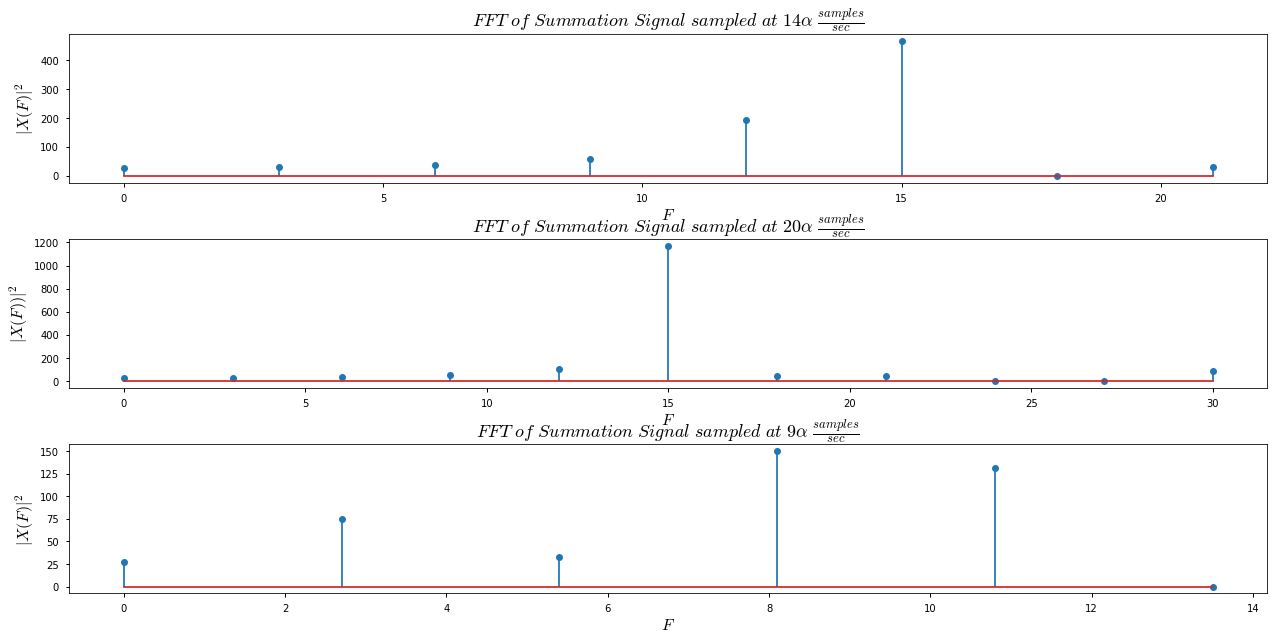

In [ ]:
ft = [np.fft.rfft(cummulative_signal(n1)), np.fft.rfft(cummulative_signal(n2)), np.fft.rfft(cummulative_signal(n3))]
power_spectrum = [np.square(np.abs(ft[0])), np.square(np.abs(ft[1])), np.square(np.abs(ft[2]))]
frequencies = [np.linspace(0, sfreq[0]/2, len(power_spectrum[0])), np.linspace(0, sfreq[1]/2, len(power_spectrum[1])), np.linspace(0, sfreq[2]/2, len(power_spectrum[2]))]
#Plots
fig, axes = plt.subplots(3, figsize=(18, 9))
fig.tight_layout(pad=4)
axes[0].stem(frequencies[0], power_spectrum[0], use_line_collection=True)
axes[0].set_title(r'$FFT\ of\ Summation\ Signal\ sampled\ at\ 14\alpha\ \frac{samples}{sec}$', fontsize=18)
axes[0].set_xlabel('$F$', fontsize=16)
axes[0].set_ylabel(r'$|X(F)|^2$', fontsize=16)
axes[1].stem(frequencies[1], power_spectrum[1], use_line_collection=True)
axes[1].set_title(r'$FFT\ of\ Summation\ Signal\ sampled\ at\ 20\alpha\ \frac{samples}{sec}$', fontsize=18)
axes[1].set_xlabel('$F$', fontsize=16)
axes[1].set_ylabel(r'$|X(F))|^2$', fontsize=16)
axes[2].stem(frequencies[2], power_spectrum[2], use_line_collection=True)
axes[2].set_title(r'$FFT\ of\ Summation\ Signal\ sampled\ at\ 9\alpha\ \frac{samples}{sec}$', fontsize=18)
axes[2].set_xlabel('$F$', fontsize=16)
axes[2].set_ylabel(r'$|X(F)|^2$', fontsize=16)

Problem  #2
-----
-----

In [ ]:
# Do       Re      Mi    Fa    So      La    Ti     Do
# C	       D       E     F     G       A     B      C
# 261.63 293.66 329.63 349.23 392.00 440.00 493.88 523.25 are the corresponding frequencies
for i, f in enumerate([18000, 12000, 6000, 3000, 800, 200]):
  sound = []
  for index, note in enumerate([261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25]):
    sound = np.hstack([sound, np.sin(2*np.pi*note*np.arange(0.5*(index-1), 0.5*index, 1/f))])
  display(Audio(sound, rate=f))
  wavfile.write('Problem_2_output_%s.wav' %(i), f, sound.astype(np.float32))

Problem  #3
-----
-----

In [ ]:
fs, signal = wavfile.read('Track003.wav')
signal = signal/32767.0
downsample_1 = sg.resample(signal, int((len(signal)/fs)*(fs/2)) + 1)
downsample_2 = sg.resample(signal, int((len(signal)/fs)*(fs/3)) + 1)
downsample_3 = sg.resample(signal, int((len(signal)/fs)*(fs/4)) + 1)
wavfile.write('problem_3_output_1_downsample.wav', int(fs/2), (downsample_1 * 32767.0).astype(np.float32))
wavfile.write('problem_3_output_2_downsample.wav', int(fs/3), (downsample_2 * 32767.0).astype(np.float32))
wavfile.write('problem_3_output_3_downsample.wav', int(fs/4), (downsample_3 * 32767.0).astype(np.float32))